### 6.1) Import modules

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn.decomposition import PCA

### 6.2) Load, split and standardize Wine classification dataset
https://scikit-learn.org/stable/datasets/index.html#wine-dataset

In [2]:
X, y = load_wine(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=0)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 6.3) Define accuracy function

In [3]:
def accuracy(y_true, y_pred):
    
    m = len(y_true)
    
    num_correct = 0
    
    for i in range(m):
        
        if y_pred[i] == y_true[i]:
            
            num_correct += 1
    
    accuracy = num_correct / m
    
    return accuracy

### 6.4) Train and evaluate K-Means Clustering algorithm

In [4]:
k_means_clust = cluster.KMeans(n_clusters=3, init='random', random_state=0) # n_clusters is equivalent to "k"

y_pred_train = k_means_clust.fit_predict(X_train_scaled)
y_pred_test = k_means_clust.predict(X_test_scaled)

k_means_clust_train_acc = accuracy(y_train, y_pred_train)
k_means_clust_test_acc = accuracy(y_test, y_pred_test)

print('K-Means Clustering training accuracy: ', k_means_clust_train_acc)
print('K-Means Clustering testing accuracy: ', k_means_clust_test_acc)

K-Means Clustering training accuracy:  0.971830985915493
K-Means Clustering testing accuracy:  0.9444444444444444


### 6.5) Perform PCA to training and testing data

In [5]:
pca = PCA(random_state=0)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(pca.explained_variance_ratio_)

[0.36884109 0.19318394 0.10752862 0.07421996 0.06245904 0.04909
 0.04117287 0.02495984 0.02308855 0.01864124 0.01731766 0.01252785
 0.00696933]


### 6.6) Plot first two principal components

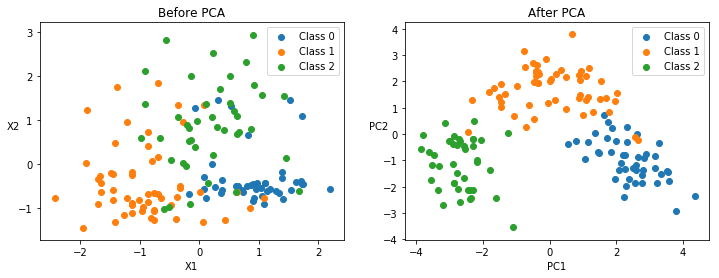

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.scatter(X_train_scaled[y_train==0, 0], X_train_scaled[y_train==0, 1], label='Class 0')
plt.scatter(X_train_scaled[y_train==1, 0], X_train_scaled[y_train==1, 1], label='Class 1')
plt.scatter(X_train_scaled[y_train==2, 0], X_train_scaled[y_train==2, 1], label='Class 2')
plt.title('Before PCA')
plt.xlabel('X1')
plt.ylabel('X2', rotation=0)
plt.legend()

plt.subplot(122)
plt.scatter(X_train_pca[y_train==0, 0], X_train_pca[y_train==0, 1], label='Class 0')
plt.scatter(X_train_pca[y_train==1, 0], X_train_pca[y_train==1, 1], label='Class 1')
plt.scatter(X_train_pca[y_train==2, 0], X_train_pca[y_train==2, 1], label='Class 2')
plt.title('After PCA')
plt.xlabel('PC1')
plt.ylabel('PC2', rotation=0)
plt.legend()

plt.show()